# 데이터 시각화(정량 데이터 위주)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

plt.rc("font", family="Malgun Gothic")

c:\users\samsung\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. 단일요인 시각화
- countplot
- distplot
- waffle

In [2]:
data_path = 'data/'

df=pd.read_csv(data_path + "extended_googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Last Updated (Year),Last Updated (Year/Month),Category (categorical),Type (categorical),Genres (categorical),Current Ver (categorical),Android Ver (categorical),Last Updated (Year/Month) (categorical),No_reviews_count,Reviews_present_count
0,Photo Editor & Candy Camera & Grid & ScrapBook,0.0,4.1,159,19.0,10000.0,0.0,0.0,Everyone,9.0,...,2018,80.0,ART_AND_DESIGN,Free,Art & Design,1.0.0,4.0.3 and up,2018-01,0,0
1,Coloring book moana,0.0,3.9,967,14.0,500000.0,0.0,0.0,Everyone,12.0,...,2018,80.0,ART_AND_DESIGN,Free,Art & Design;Pretend Play,2.0.0,4.0.3 and up,2018-01,14,44
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0.0,4.7,87510,8.7,5000000.0,0.0,0.0,Everyone,9.0,...,2018,87.0,ART_AND_DESIGN,Free,Art & Design,1.2.4,4.0.3 and up,2018-08,0,0
3,Sketch - Draw & Paint,0.0,4.5,215644,25.0,50000000.0,0.0,0.0,Teen,9.0,...,2018,85.0,ART_AND_DESIGN,Free,Art & Design,Varies with device,4.2 and up,2018-06,0,0
4,Pixel Draw - Number Art Coloring Book,0.0,4.3,967,2.8,100000.0,0.0,0.0,Everyone,11.0,...,2018,85.0,ART_AND_DESIGN,Free,Art & Design;Creativity,1.1,4.4 and up,2018-06,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,11.0,4.5,38,53.0,5000.0,0.0,0.0,Everyone,38.0,...,2017,74.0,FAMILY,Free,Education,1.48,4.1 and up,2017-07,0,0
9655,Fr. Mike Schmitz Audio Teachings,11.0,5.0,4,3.6,100.0,0.0,0.0,Everyone,38.0,...,2018,86.0,FAMILY,Free,Education,1.0,4.1 and up,2018-07,0,0
9656,Parkinson Exercices FR,20.0,NaN,3,9.5,1000.0,0.0,0.0,Everyone,70.0,...,2017,68.0,MEDICAL,Free,Medical,1.0,2.2 and up,2017-01,0,0
9657,The SCP Foundation DB fr nn5n,3.0,4.5,114,NaN,1000.0,0.0,0.0,Mature 17+,19.0,...,2015,44.0,BOOKS_AND_REFERENCE,Free,Books & Reference,Varies with device,Varies with device,2015-01,0,0


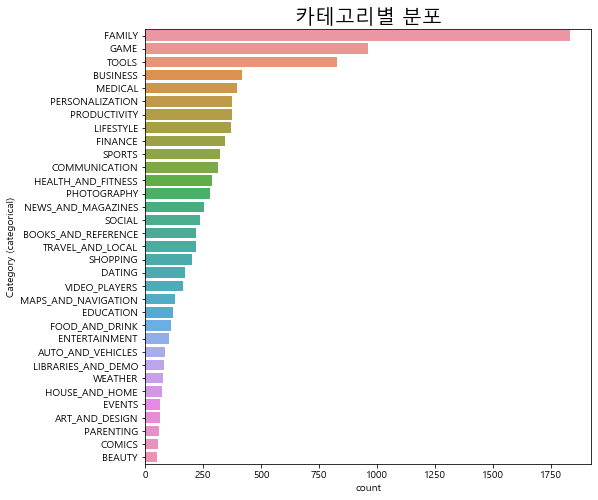

In [3]:
# countplot

plt.figure(figsize=(8,8))
plt.title('카테고리별 분포', fontsize=20)
sns.countplot(y ='Category (categorical)', data = df, 
              order = df['Category (categorical)'].value_counts().index)
plt.show()

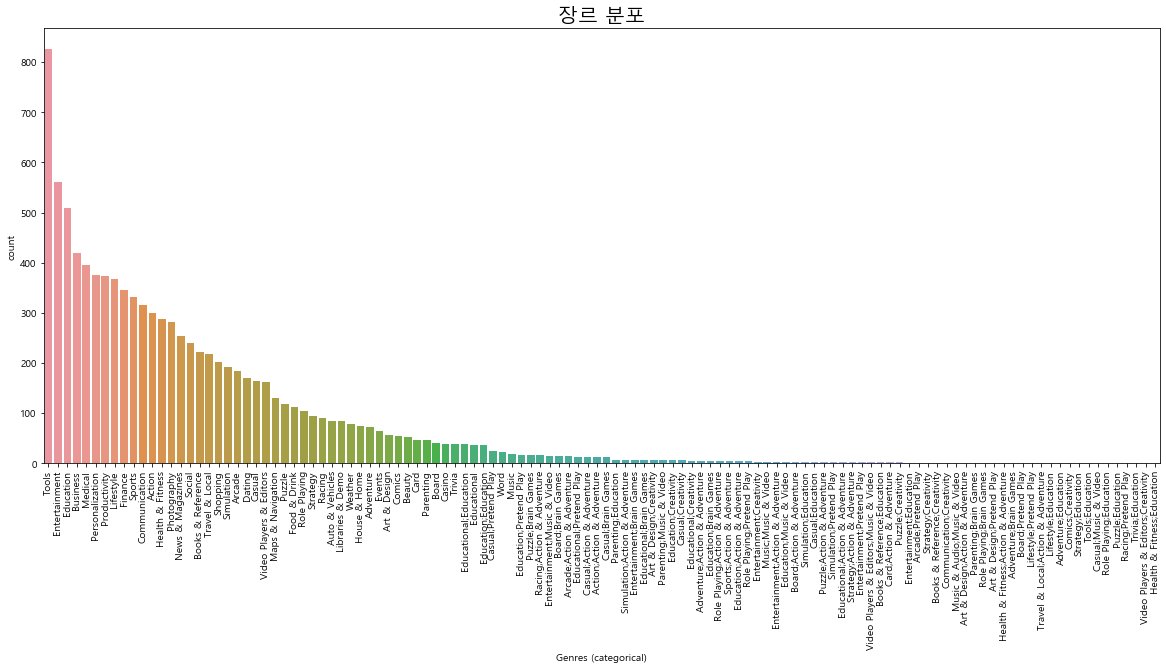

In [4]:
plt.figure(figsize=(20,8))
plt.title('장르 분포', fontsize=20)
sns.countplot(x ='Genres (categorical)', data = df,
             order = df['Genres (categorical)'].value_counts().index)
plt.xticks(fontsize=10,rotation=90)
plt.show()

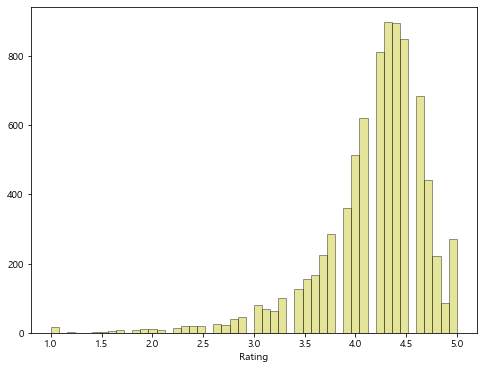

In [35]:
# distplot
plt.figure(figsize = (8,6))
sns.distplot(df['Rating'], kde=False,
              color = 'y', bins = 50,
            hist_kws=dict(edgecolor="k", linewidth=1))
plt.show()

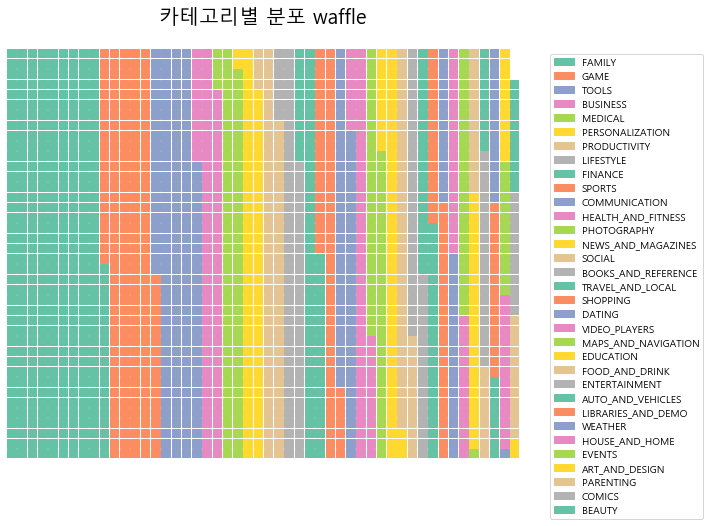

In [5]:
#waffle

CAT_NUM = df['Category (categorical)'].value_counts().sort_index(ascending=True)
CAT_NUM_INDEX=CAT_NUM.index

CAT_NUM_SORTED=CAT_NUM.sort_values(ascending=False)
CAT_NUM_SORTED_INDEX=CAT_NUM.sort_values(ascending=False).index
dic_list_label=list(CAT_NUM_SORTED.index)
dic_list_value=list(CAT_NUM_SORTED)

dictionary = dict(zip(dic_list_label, dic_list_value))
#dictionary = dict(zip(string_list, int_list))


plt.figure(
    figsize=(10,10),
    FigureClass=Waffle,
    rows=40,
    columns=50,
    values=dictionary,
    legend={'loc': 'upper left','bbox_to_anchor': (1.05, 1)})


plt.title('카테고리별 분포 waffle',position=(0.5, 1.05), fontsize=20)
plt.show()

## 2. 2요인 시각화
- countplot
- catplot
- violinplot
- lineplot

In [6]:
def get_new(x):
    if x < 1000 :
        return '천 미만'
    elif (x >= 1000) & (x < 10000):
        return '천'
    elif (x >= 10000) & (x < 100000):
        return '만'
    elif (x >= 100000) & (x < 1000000):
        return '십만'
    elif (x >= 1000000) & (x < 10000000):
        return '백만'
    else :
        return '천만 이상'
    
order_list = ['천 미만','천','만','십만','백만','천만 이상']

In [7]:
df['다운로드'] = df['Installs'].apply(lambda x : get_new(x))
df['리뷰'] = df['Reviews'].apply(lambda x : get_new(x))

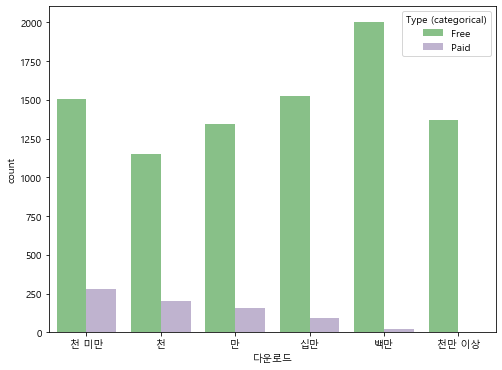

In [34]:
# countplot
plt.figure(figsize = (8,6))
sns.countplot(x ='다운로드', data = df, hue = 'Type (categorical)',
               palette="Accent",
             order=['천 미만','천','만','십만','백만','천만 이상'])

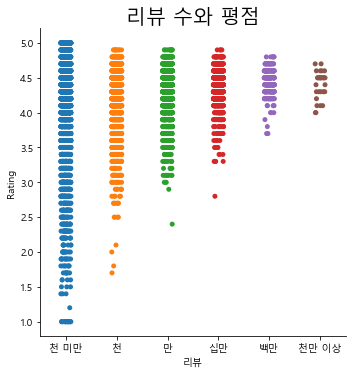

In [8]:
# catplot
sns.catplot(x = '리뷰', y ='Rating',
            order = order_list,
            data = df)
plt.title('리뷰 수와 평점', fontsize=20)
plt.show()

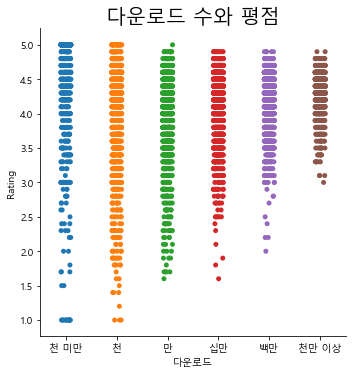

In [9]:
sns.catplot(x = '다운로드', y ='Rating',  
                order=order_list,
                data = df)
plt.title('다운로드 수와 평점', fontsize=20)
plt.show()

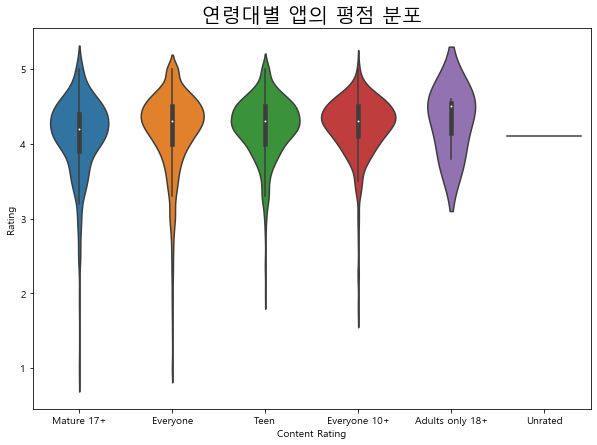

In [10]:
#Violin Plot
plt.figure(figsize=(10,7))
plt.title('연령대별 앱의 평점 분포', fontsize=20)
sns.violinplot(data=df, x="Content Rating", y="Rating",
              order=['Mature 17+','Everyone','Teen','Everyone 10+','Adults only 18+','Unrated'])
plt.show()

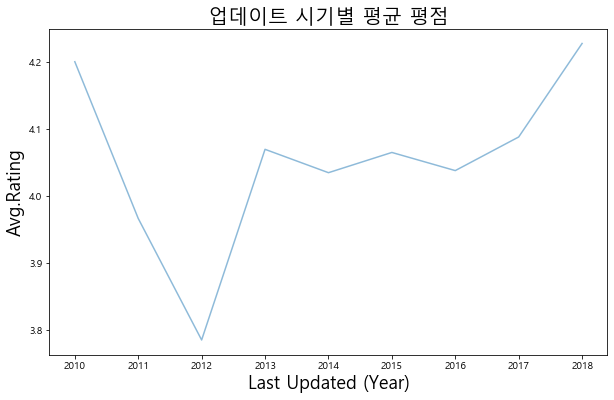

In [25]:
#lineplot

label = list(df.groupby('Last Updated (Year)')['Rating'].mean().values)
index = df.groupby('Last Updated (Year)')['Rating'].mean().index

plt.figure(figsize=(10,6))
sns.lineplot(x = index, y = label, alpha = 0.5)
plt.title('업데이트 시기별 평균 평점', fontsize=20)
plt.xlabel('Last Updated (Year)', fontsize=18)
plt.ylabel('Avg.Rating', fontsize=18)
plt.show()

## 3. 3요인 시각화
- boxplot

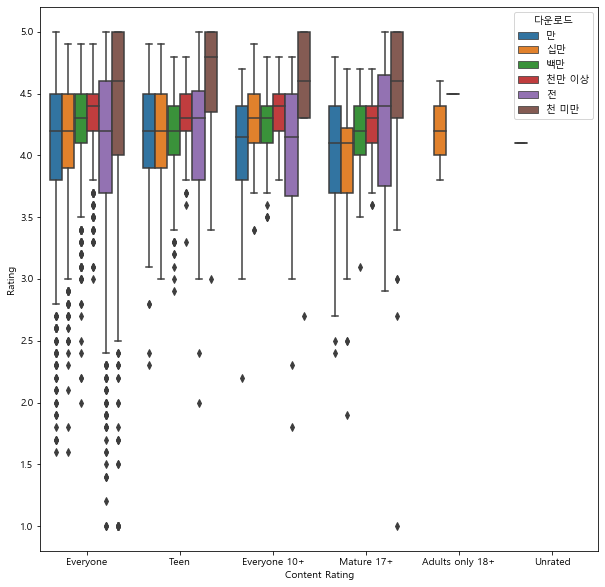

In [28]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x="Content Rating", y="Rating", hue = '다운로드')
plt.show()

In [38]:
df.groupby('다운로드')['Rating'].mean().values

array([4.03857341, 4.21978239, 4.13285357, 4.0473262 , 4.34538341,
       4.31633844])

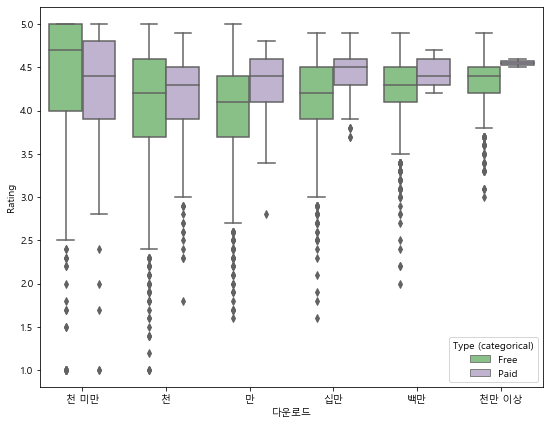

In [43]:
plt.figure(figsize = (9,7))
sns.boxplot(data = df, x = df['다운로드'], y = df['Rating'] , hue = df['Type (categorical)'],
               palette="Accent",
             order=['천 미만','천','만','십만','백만','천만 이상'])
plt.show()

## 4. 워드클라우드

In [52]:
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
from tqdm import tqdm

from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()

icon = Image.open(data_path + 'circle.png')
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

In [45]:
review = pd.read_csv(data_path + 'profiled_Translated_Review.csv')
review.head()

,App,Translated_Review,sentences_count,characters_count,spaces_count,words_count,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,...,sentiment_polarity_summarised,sentiment_subjectivity_score,sentiment_subjectivity,sentiment_subjectivity_summarised,spelling_quality_score,spelling_quality,spelling_quality_summarised,original_Sentiment,original_Sentiment_Polarity,original_Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,2.0,122.0,20.0,22.0,6.0,102.0,0.0,1.0,...,Positive,0.533333,Objective/subjective,Objective/subjective,0.75,Pretty good,Good,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,1.0,47.0,6.0,7.0,0.0,41.0,0.0,0.0,...,Positive,0.288462,Pretty objective,Objective,1.00,Very good,Good,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,1.0,42.0,5.0,6.0,0.0,37.0,0.0,0.0,...,Positive,0.875000,Quite subjective,Subjective,1.00,Very good,Good,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,1.0,12.0,2.0,3.0,0.0,10.0,0.0,0.0,...,Positive,0.300000,Pretty objective,Objective,1.00,Very good,Good,Positive,1.00,0.300000


In [86]:
def make_wordlist(data):
    wlist =[]
    for t in tqdm(data['Translated_Review'].values): # 문장 토큰화
        if pd.isnull(t) != True:
            wlist.append(tokenizer.tokenize(t))
            
    wdict = dict()
    for i in wlist: # 단어 딕셔너리 생성
        for j in i:
            if len(j) > 1: #2글자 이상의 단어만
                j = j.lower()
                wdict.setdefault(j,0)
                wdict[j] += 1
            
    result = sorted(list(wdict.items()), key = lambda x :x[1],reverse = True) # 빈도수 리스트반환
    return result, wdict
    
def make_cloud(d) :
    print("이미지 생성중...")
    wordcloud = WordCloud(font_path='font/malgun.ttf', background_color='white',width = 1400,
                     height = 800,  mask = mask).generate_from_frequencies(d)
    plt.figure(figsize=(22,22)) #이미지 사이즈 지정
    plt.imshow(wordcloud, interpolation='lanczos') #interpolation: 이미지의 부드럽기 정도
    plt.axis('off') #x y 축 숫자 제거
    plt.show() 

100%|██████████████████████████████████████████████████████████████████████████| 23998/23998 [00:03<00:00, 7609.93it/s]


이미지 생성중...


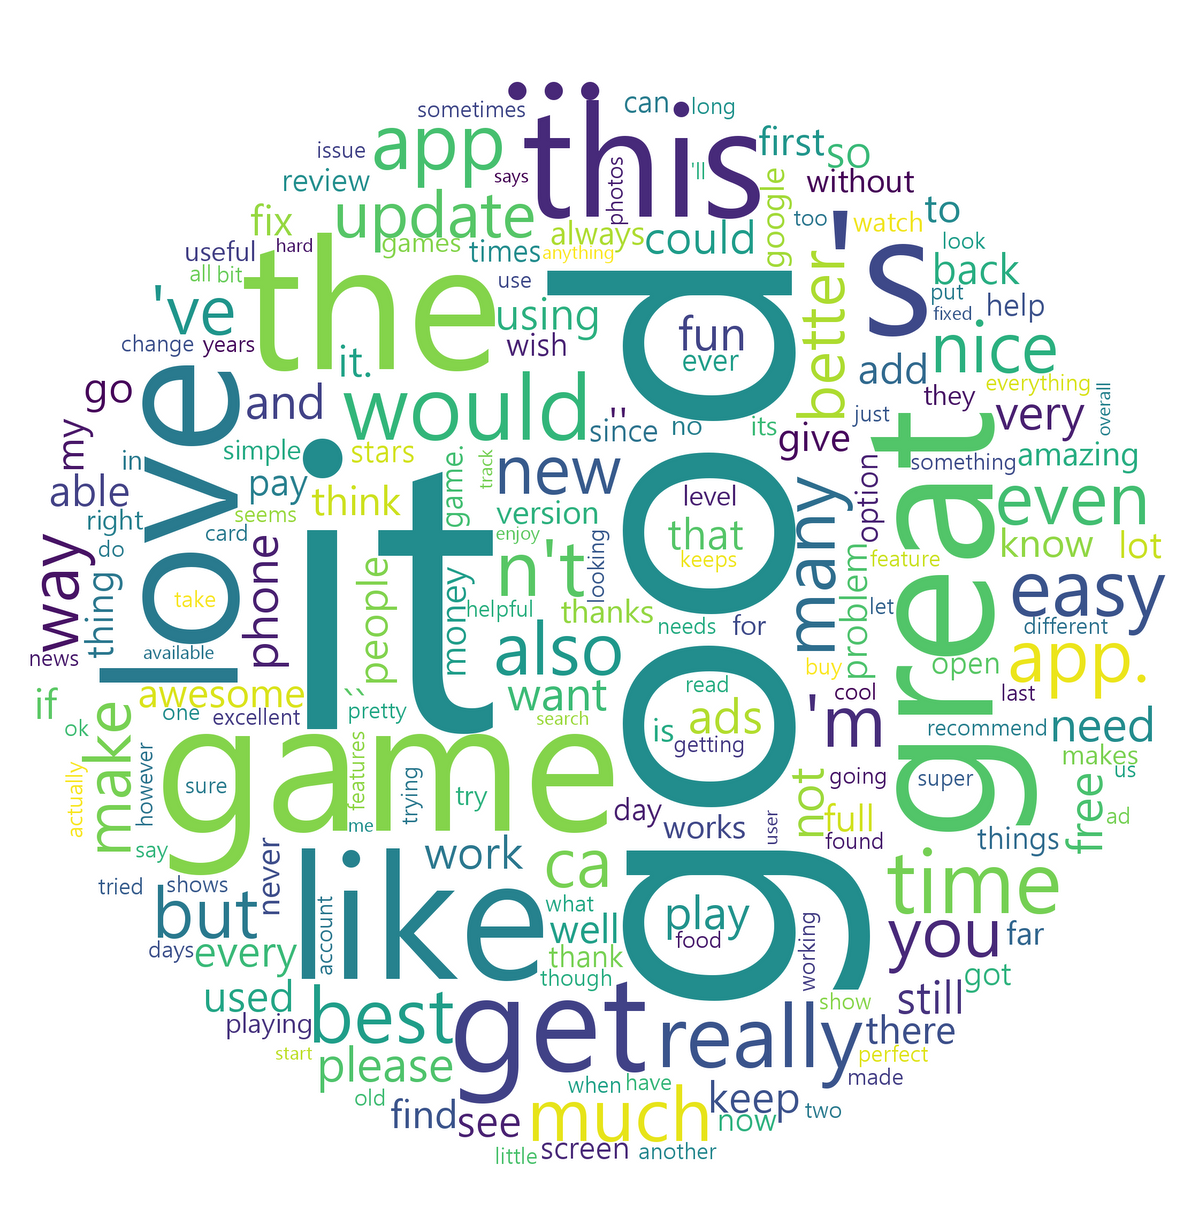

In [87]:
pos_lst, pos_dict = make_wordlist(review[review['original_Sentiment'] == 'Positive'])
make_cloud(pos_dict)

100%|████████████████████████████████████████████████████████████████████████████| 8271/8271 [00:01<00:00, 6853.76it/s]


이미지 생성중...


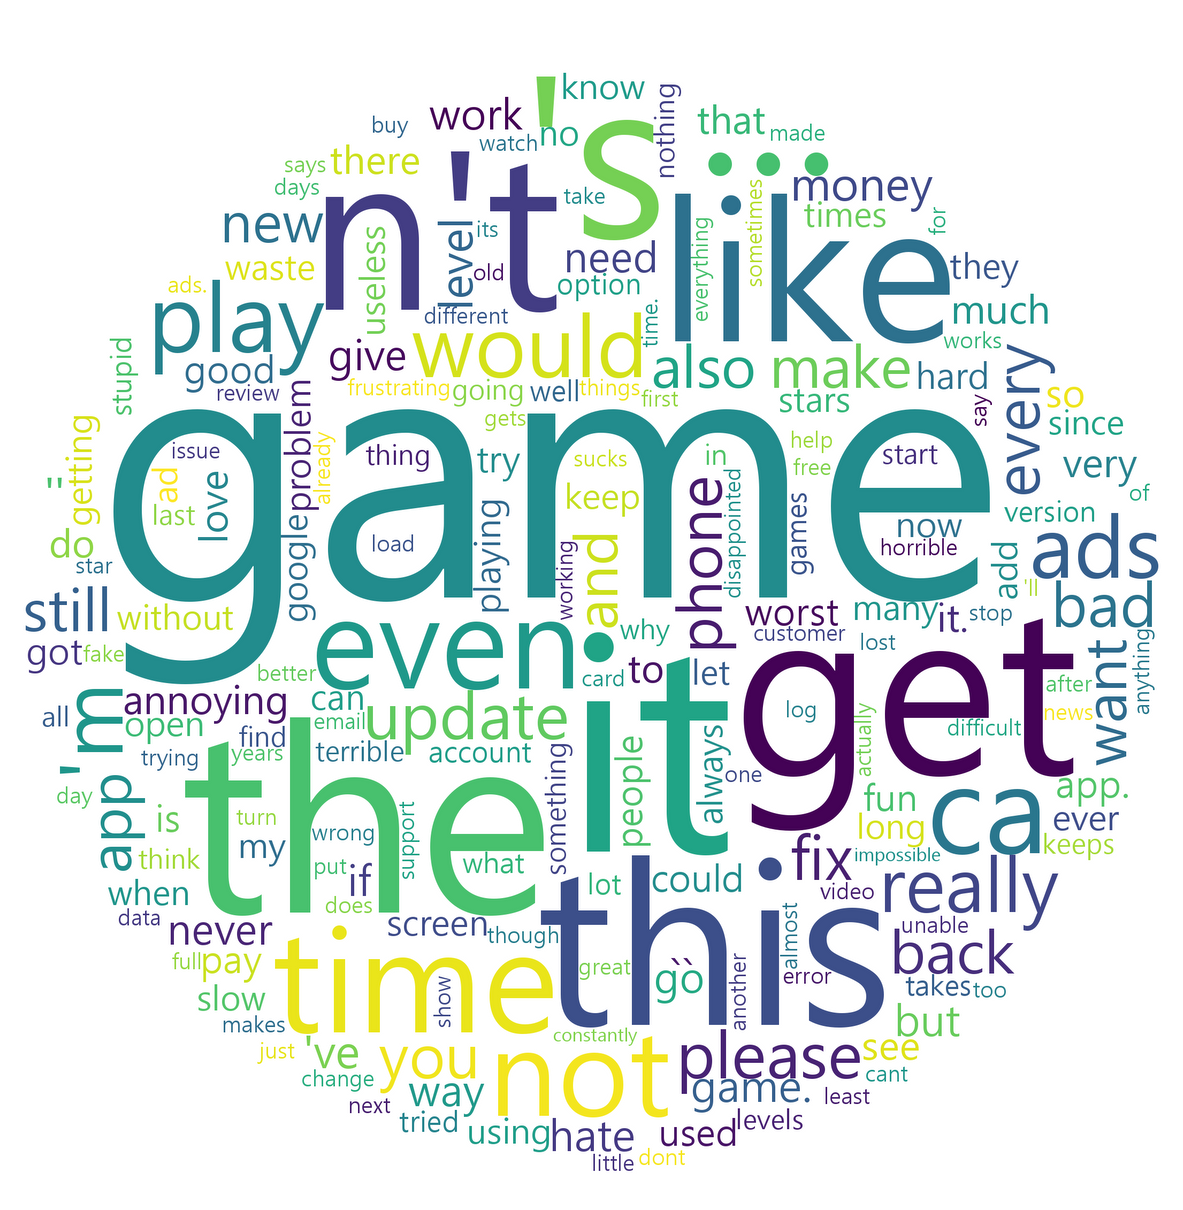

In [88]:
neg_lst, neg_dict = make_wordlist(review[review['original_Sentiment'] == 'Negative'])
make_cloud(neg_dict)